In [3]:
#!pip install geopandas
#!pip install contextily
import geopandas
import contextily as ctx
import matplotlib as plt

1. caricare i quartieri in un geodataframe


In [ ]:
quartieri = geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/geopandas-tutorial-master/ds964_nil_wm/NIL_WM.dbf")
quartieri

2. visualizzare l'intestazione


3. visualizzare i nomi di tutti i quartieri presenti in ordine alfabetico


In [ ]:
quartieri.sort_values("NIL", ascending=True)

4. visualizzare tutti i quartieri su una mappa di Milano


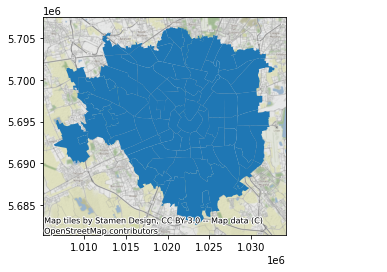

In [18]:
ax = quartieri.to_crs(epsg=3857).plot()
ctx.add_basemap(ax)

5. cercare il quartiere che contiene il Duomo di Milano


In [40]:
from shapely.geometry import Point
duomo = Point(9.191389, 45.464167)
quartieri[quartieri.contains(duomo)]

,ID_NIL,NIL,Valido_dal,Valido_al,Fonte,Shape_Leng,Shape_Area,OBJECTID,geometry
12,1,DUOMO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,7571.275544,2.341616e+06,101,"POLYGON ((9.19482 45.47201, 9.19495 45.47213, ..."


6. visualizzare sulla mappa il Duomo di Milano e il quartiere che lo contiene


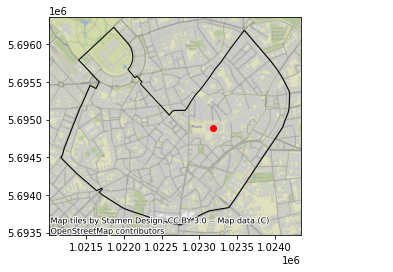

In [41]:
ax = quartieri[quartieri.contains(duomo)].to_crs(epsg=3857).plot(edgecolor = "k", facecolor = "none")
geopandas.GeoSeries([duomo], crs='EPSG:4326').to_crs(epsg=3857).plot(ax=ax, color='red')
ctx.add_basemap(ax)

7. visualizzare i quartieri vicini a quello che contiene il Duomo


In [87]:
q = quartieri[quartieri.contains(duomo)].geometry.squeeze()
quartieri[quartieri.touches(q)]

,ID_NIL,NIL,Valido_dal,Valido_al,Fonte,Shape_Leng,Shape_Area,OBJECTID,geometry
13,4,GUASTALLA,05/02/2020,Vigente,Milano 2030 - PGT Approvato,6559.532771,1.547962e+06,102,"POLYGON ((9.20700 45.46787, 9.20712 45.46721, ..."
25,8,PARCO SEMPIONE,05/02/2020,Vigente,Milano 2030 - PGT Approvato,2966.984475,4.704203e+05,114,"POLYGON ((9.17958 45.47255, 9.17636 45.47043, ..."
34,6,PORTA TICINESE - CONCA DEL NAVIGLIO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,5293.159062,1.255017e+06,123,"POLYGON ((9.18740 45.45603, 9.18736 45.45584, ..."
60,5,PORTA VIGENTINA - PORTA LODOVICA,05/02/2020,Vigente,Milano 2030 - PGT Approvato,4710.382643,1.135196e+06,149,"POLYGON ((9.20186 45.45238, 9.20115 45.45196, ..."
79,7,MAGENTA - S. VITTORE,05/02/2020,Vigente,Milano 2030 - PGT Approvato,5492.852406,1.390094e+06,168,"POLYGON ((9.17538 45.46981, 9.17606 45.46932, ..."
